## Laboratorio 05 - SARSA y Q-Learning
Integrantes:
- Ricardo Méndez
- Melissa Pérez

Repositorio: https://github.com/MelissaPerez09/Lab05-CC3104

### Task 01
1. Defina y explique qué “expected sarsa”
    - Es una variante de SARSA que calcula el valor esperado de la acción siguiente ponderando todas las acciones posibles según la política actual, en lugar de usar solo la acción efectivamente tomada.
    
    a. ¿Cómo se diferencia de “sarsa”?
    - La diferencia es que SARSA usa la recompensa de la acción real tomada, mientras que Expected SARSA usa el valor esperado sobre todas las acciones.
    
    b. ¿Para qué sirven las modificaciones que se hacen sobre “sarsa”?
    - Sirve para reducir la varianza de las actualizaciones y mejora la estabilidad del aprendizaje.
2. Defina y explique qué es “n-step TD”
    - Es un Método "Temporal Difference" que actualiza el valor usando la suma de recompensas de `n` pasos futuros antes de estimar el valor restante.
    
    a. ¿Cómo se diferencia de TD(0)?
    - `TD(0)` usa solo el siguiente paso que es `n=1`, mientras que n-step considera varios pasos intermedios.
    
    b. ¿Cuál es la utilidad de esta modificación?
    - Principalmente es el balanceo de sesgo y varianza, y puede acelerar la convergencia.
    
    c. ¿Qué usa como objetivo?
    - Usa un retorno de n pasos, que combina recompensas reales de los primeros n pasos y un valor estimado al paso n.
3. ¿Cuál es la diferencia entre SARSA y Q-learning?
    - SARSA:
        - On-policy 
        - Aprende siguiendo y evaluando la misma política.
    - Q-learning:
        - Off-policy
        - Aprende evaluando la política óptima mientras sigue otra política (ej. exploratoria).

### Task 02

In [38]:
import gymnasium
import matplotlib.pyplot as plt
import numpy as np

In [39]:
environment = gymnasium.make("CliffWalking-v1")

In [ ]:
lr = 0.01
D = 0.9
epsilon = 0.1

In [41]:
def SARSA(env, num_episodes, lr, D, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset() 
        eps_reward = 0
        action = np.argmax(Q[state] + np.random.randn(1, env.action_space.n) * epsilon)
        done = False
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            eps_reward += reward
            next_action = np.argmax(Q[next_state] + np.random.randn(1, env.action_space.n) * epsilon)
            Q[state, action] += lr * (reward + D * Q[next_state, next_action] - Q[state, action])
            state, action = next_state, next_action
        rewards.append(eps_reward)
    return Q, rewards

In [42]:
def QLearning(env, num_episodes, lr, D, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        eps_reward = 0
        done = False
        while not done:
            action = np.argmax(Q[state] + np.random.randn(1, env.action_space.n) * epsilon)
            next_state, reward, done, _, _ = env.step(action)
            eps_reward += reward
            Q[state, action] += lr * (reward + D * np.max(Q[next_state]) - Q[state, action])
            state = next_state
        rewards.append(eps_reward)
    return Q, rewards

In [43]:
sarsa, rewards_sarsa = SARSA(environment, 2000, lr, D, epsilon)
q_learning, rewards_q_learning = QLearning(environment, 2000, lr, D, epsilon)

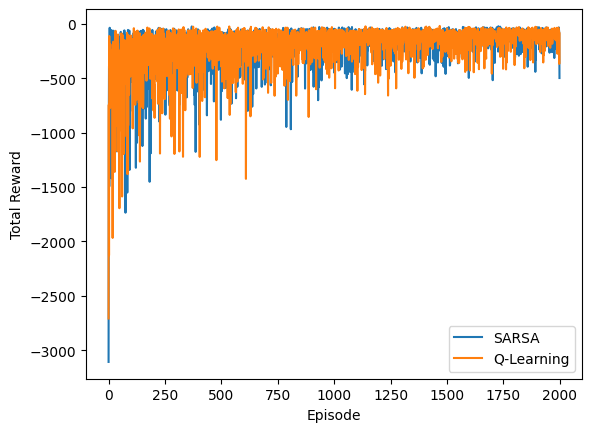

In [44]:
plt.plot(rewards_sarsa, label='SARSA')
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()